In [9]:
from sklearn.externals import joblib
import pandas as pd

In [4]:
with open('data/amazon.pkl', 'rb') as f:
    data = joblib.load(f)

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [5]:
locals().update(data)

In [13]:
count = tdm.sum(axis=0)
word_count = pd.DataFrame({"단어":vectorizer.get_feature_names(), "빈도":count.flat})
word_count.tail()

/anaconda3/lib/python3.7/site-packages/pandas/core/dtypes/dtypes.py:271: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


,단어,빈도
995,wrongly,0.396701
996,year,3.274197
997,years,3.972779
998,yell,0.539954
999,yes,0.638298


In [20]:
sort_df = word_count.sort_values('빈도', ascending=False) #asscending = 올름차순/내림차신
sort_df.head()

,단어,빈도
459,phone,46.663864
310,great,40.657307
306,good,29.231608
522,product,23.608777
985,works,21.664389


In [22]:
!pip install WordCloud

    100% |████████████████████████████████| 163kB 583kB/s ta 0:00:01


In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [26]:
word_count_dict = dict(zip(word_count["단어"], word_count['빈도']))
list(word_count_dict.items())[100:105]

[('awesome', 2.8419500431604723),
 ('awful', 1.9911216404387013),
 ('background', 1.2072072657580095),
 ('bad', 7.446001437661592),
 ('bar', 0.9990328433579316)]

In [28]:
wc = WordCloud(background_color='white', width=1080, height=960)
cloud = wc.fit_words(word_count_dict)

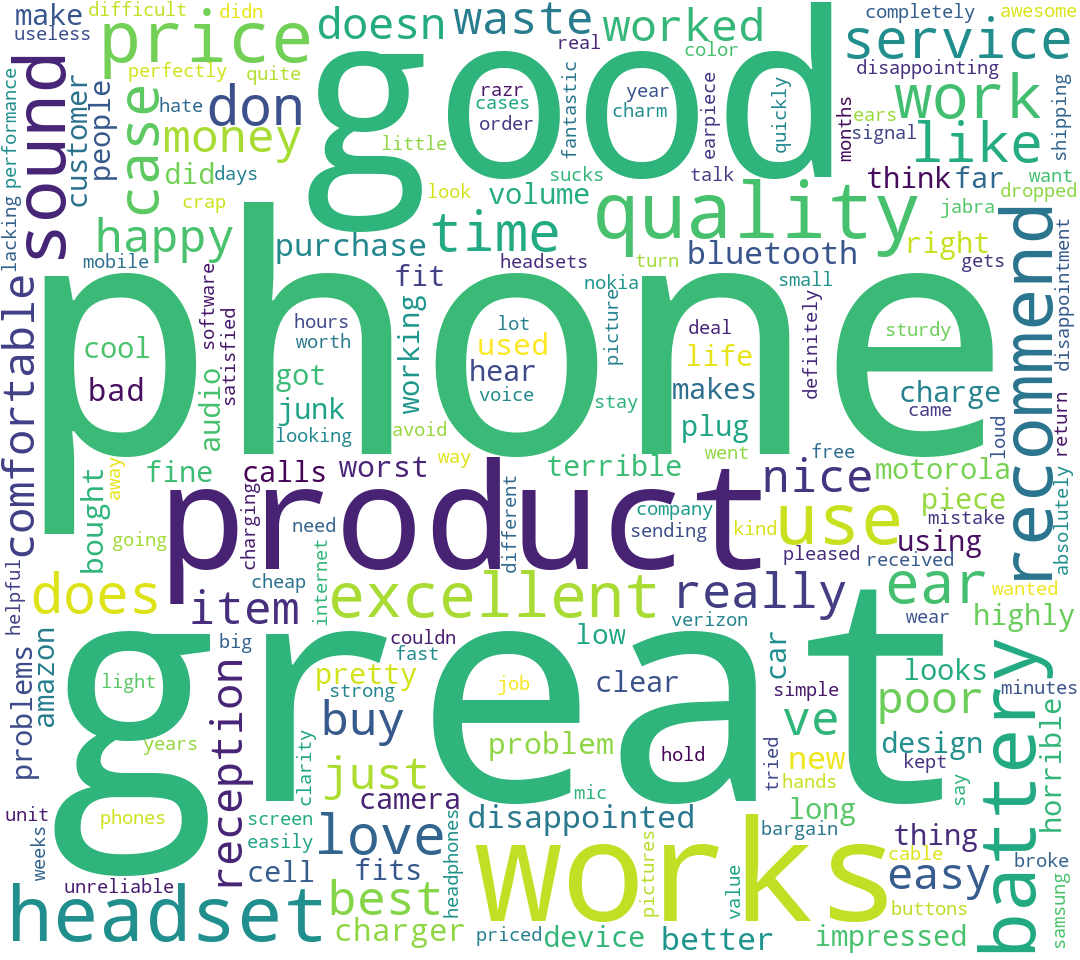

In [31]:
cloud.to_image()

In [49]:
with open('data/hot_news.pkl', 'rb') as f:
    data = joblib.load(f)
data

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


{'vectorizer': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=1000, min_df=1,
         ngram_range=(1, 1), preprocessor=None, stop_words=None,
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=<function get_nouns at 0x1a1fb0f9d8>, vocabulary=None),
 'tdm': <13276x1000 sparse matrix of type '<class 'numpy.int64'>'
 	with 242189 stored elements in Compressed Sparse Row format>}

In [48]:
locals().update(data)

In [44]:
def get_nouns(text):
    nouns = tagger.nouns(text)
    nouns = [word for word in nouns if len(word)>1]
    nouns = [word for word in nouns if not re.match(r'\d+', word)]
    return nouns

In [50]:
count = tdm.sum(axis=0)
word_count = pd.DataFrame({"단어":vectorizer.get_feature_names(), "빈도":count.flat})
word_count.tail()

/anaconda3/lib/python3.7/site-packages/pandas/core/dtypes/dtypes.py:271: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


,단어,빈도
995,훈련,94
996,휴가,176
997,휴가철,245
998,휴식,344
999,휴일,144


In [51]:
sort_df = word_count.sort_values('빈도', ascending=False) #asscending = 올름차순/내림차신
sort_df.head()

,단어,빈도
914,폭염,28535
814,지역,4096
163,기온,3946
423,서울,3308
164,기자,3124


In [52]:
word_count_dict = dict(zip(word_count["단어"], word_count['빈도']))
list(word_count_dict.items())[100:105]

[('공장', 99), ('과일', 90), ('관계', 92), ('관계자', 267), ('관광객', 172)]

In [53]:
wc = WordCloud(background_color='white', width=1080, height=960, font_path=)
cloud = wc.fit_words(word_count_dict)

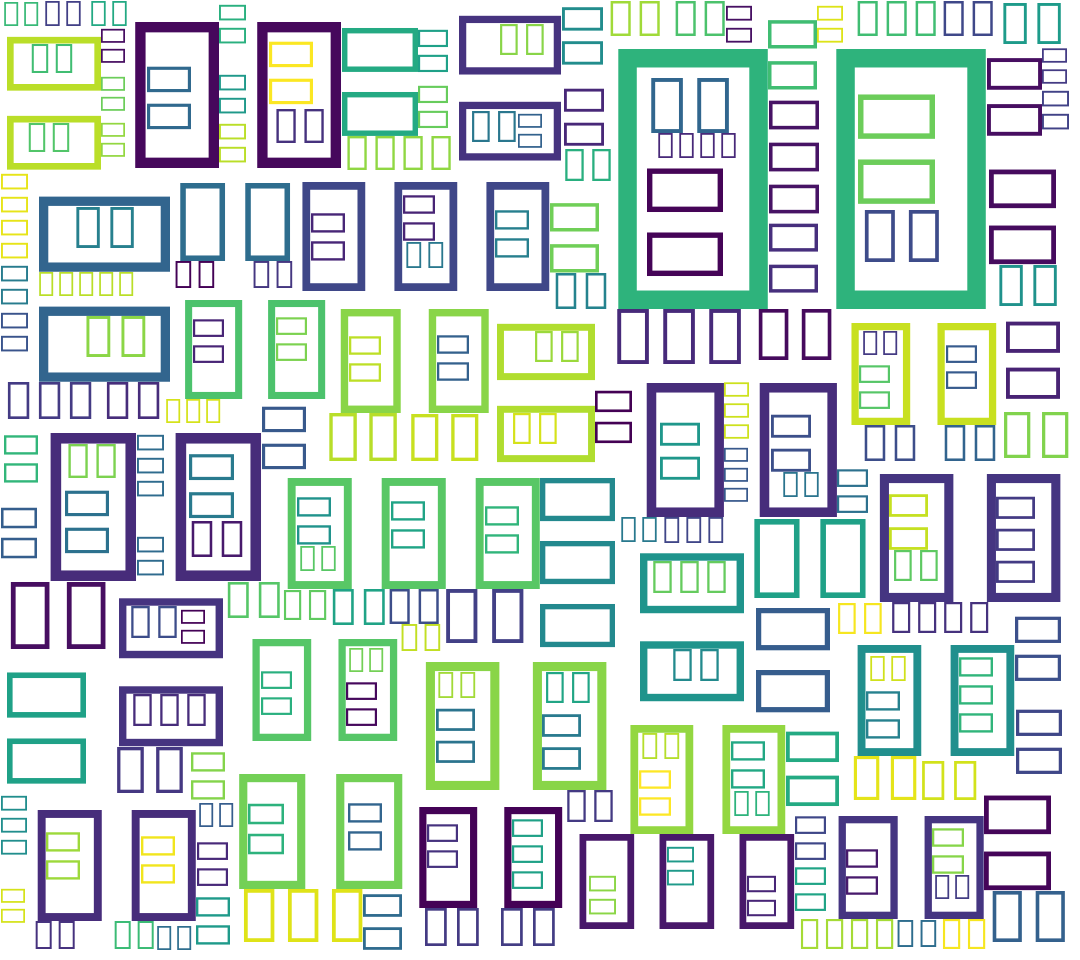

In [54]:
cloud.to_image()